In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [2]:
# load numpy zip
data = np.load('./data/data_10000_norm.npz')

In [3]:
X  = data['arr_0'] # independent features
y = data['arr_1'] # target value

In [4]:
X.shape, y.shape

((6722, 10000), (6722,))

# Extracting Eigen Images

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')

In [7]:
x_pca = pca.fit_transform(X)

In [8]:
x_pca.shape

(6722, 6722)

In [9]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

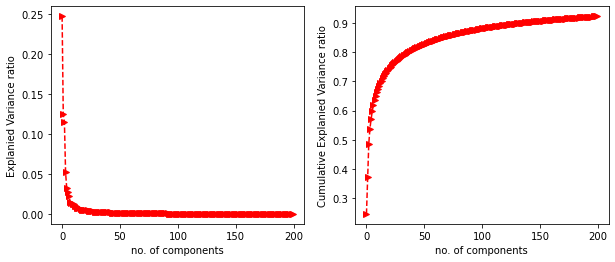

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explanied Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explanied Variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show()

conclusion: using elbow method, consider number of compoenent is between 25 - 30
> since if I consider component between 25 to 30 the explained variance is around 75 % 
so, in order to get min 80% variance I am considering 50 compoenents

In [12]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X)

In [13]:
import pickle

In [14]:
pickle.dump(pca_50,open('./pca_50.pickle','wb'))

In [15]:
pca_100 = PCA(n_components=100,whiten=True,svd_solver='auto')
x_pca_100 = pca_100.fit_transform(X)

In [16]:
pickle.dump(pca_100,open('./pca_100.pickle','wb'))

In [17]:
# consider 100 compnent and inverse transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [18]:
x_pca_inv.shape

(6722, 10000)

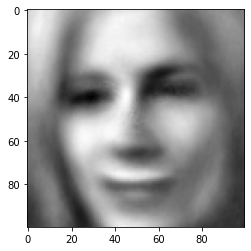

In [19]:
# consider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

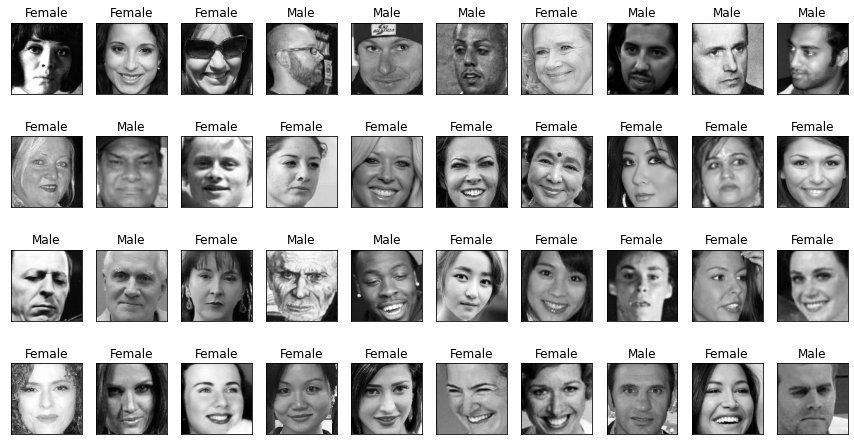

====================Eigen Images====================


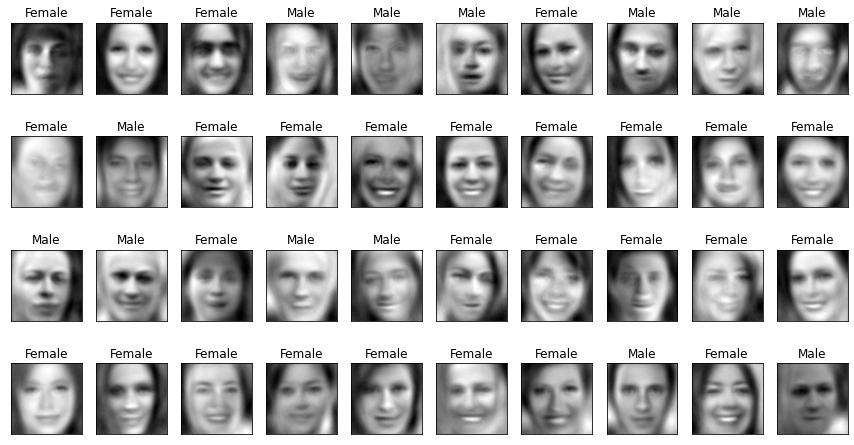

In [20]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.seed(0)     
np.random.randint(1001)
pics = np.random.randint(0,6722,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [21]:
# saving 
np.savez('./data/X_pca__y.pickle',x_pca_50,y)

In [22]:
x_pca_inv_100 = pca_100.inverse_transform(x_pca_100)

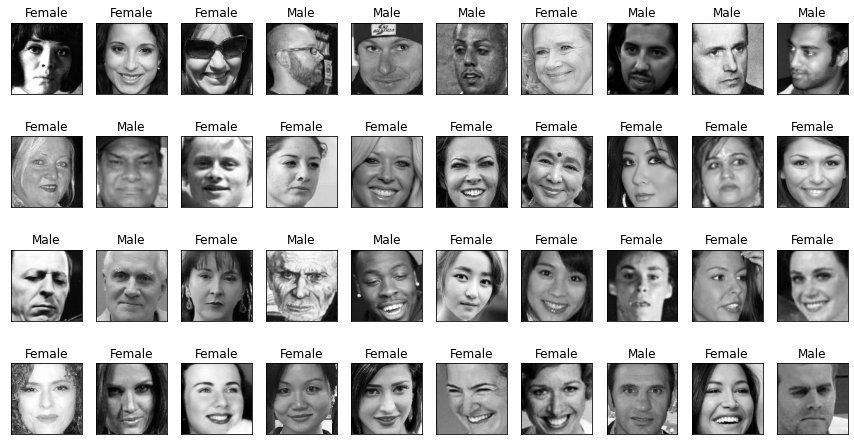

====================Eigen Images====================


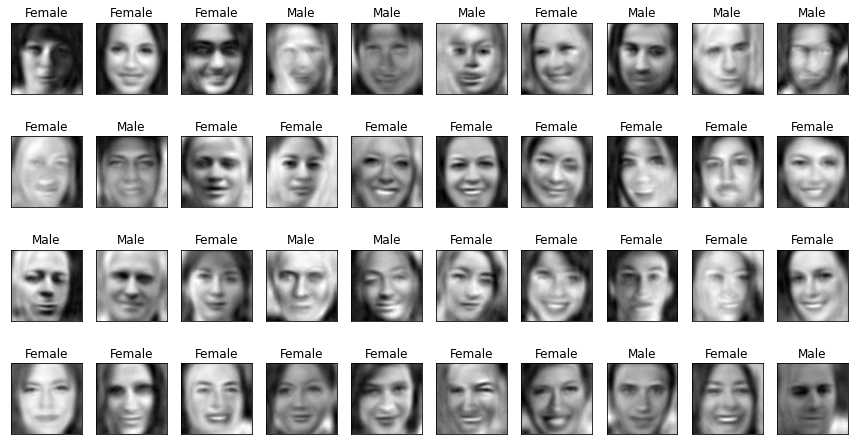

In [23]:
np.random.seed(0)  
np.random.randint(1001)
pics = np.random.randint(0,6722,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv_100[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [24]:
# saving 
np.savez('./data/X_pca_100_y.pickle',x_pca_100,y)